In [71]:
#Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [72]:
#Importing required dataset
city_master = pd.read_csv('City_Master.csv')
cust_and_bank_det = pd.read_csv('Customer_and_bank details_p1.csv')
cust_camp_det = pd.read_csv('Customer_campaign_details_p1.csv')
cust_post_code_det = pd.read_csv('Customer_Postal_Code_details.csv')
cust_resp_data = pd.read_csv('Customer_Response_data_p1.csv')
cust_social_eco_data = pd.read_csv('Customer_social_economic_data_p1.csv')
reg_code_master = pd.read_csv('Region_code_master.csv')
state_master = pd.read_csv('State_Master.csv')

# Analysis of Percentage Turnout of Marketing Campaign

In [73]:
#Perform Task 1.1 i.e. join customer response data with customer campaign data
df1 = pd.merge(cust_resp_data, cust_camp_det, on='Customer_id', how='outer')

In [74]:
#Display the joined dataset
print(df1)

       Customer_id    y    contact month day_of_week  duration  campaign  \
0                1   no  telephone   may         mon       307         1   
1                2   no  telephone   may         mon       198         1   
2                3   no  telephone   may         mon       139         1   
3                4   no  telephone   may         mon       217         1   
4                5   no  telephone   may         mon       380         1   
...            ...  ...        ...   ...         ...       ...       ...   
37079        37080  yes   cellular   nov         fri       334         1   
37080        37081   no   cellular   nov         fri       383         1   
37081        37082   no   cellular   nov         fri       189         2   
37082        37083  yes   cellular   nov         fri       442         1   
37083        37084   no   cellular   nov         fri       239         3   

       pdays  previous     poutcome  
0        999         0  nonexistent  
1        99

<AxesSubplot:title={'center':'Customer Response'}>

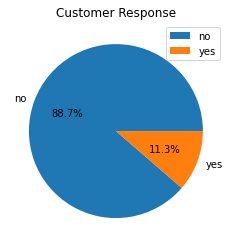

In [75]:
#Visualising the response of the customers using pie chart
response = df1['y'].value_counts()
display(response.plot.pie(y='y', autopct='%1.1f%%', label="", title="Customer Response", legend=True))

<AxesSubplot:>

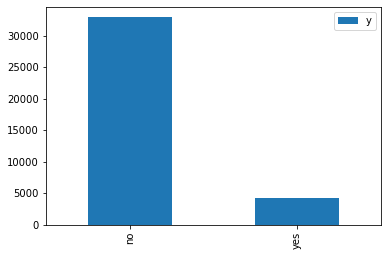

In [76]:
#Visualising the response of the customers using bar chart
display(response.plot.bar(y='y', legend=True))

# Right mode to Contact the Customers (Telephone or Cellular)

cellular     23522
telephone    13562
Name: contact, dtype: int64


<AxesSubplot:title={'center':'Mode of Contact'}, ylabel='contact'>

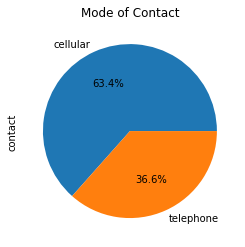

In [77]:
#visualising the mode of contacting the customers [cellular vs telephone]
resp_contact = df1['contact'].value_counts()
print(resp_contact)
display(resp_contact.plot.pie(autopct='%1.1f%%', title="Mode of Contact"))

In [78]:
tel_yes = df1[["contact", "y"]].loc[(df1["contact"] == "telephone") & (df1["y"]=="yes")]

In [79]:
tel_no = df1[["contact", "y"]].loc[(df1["contact"] == "telephone") & (df1["y"]=="no")]

In [80]:
tel =  df1[["contact", "y"]].loc[(df1["contact"] == "telephone")]

<AxesSubplot:ylabel='None'>

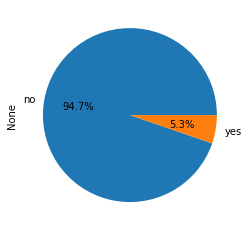

In [81]:
tel.groupby('y').size().plot.pie(autopct='%1.1f%%')

In [82]:
cellular =  df1[["contact", "y"]].loc[(df1["contact"] == "cellular")]

<AxesSubplot:ylabel='None'>

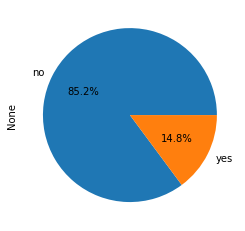

In [83]:
cellular.groupby('y').size().plot.pie(autopct='%1.1f%%')

In [84]:
#df_telephone = df1.groupby('contact').sum()
df_telephone = df1.groupby(['contact', 'y'])['Customer_id'].sum().unstack().fillna(0)

In [85]:
df_telephone

y,no,yes
contact,,
cellular,462322021,103075236
telephone,110253323,11979490


<AxesSubplot:xlabel='contact'>

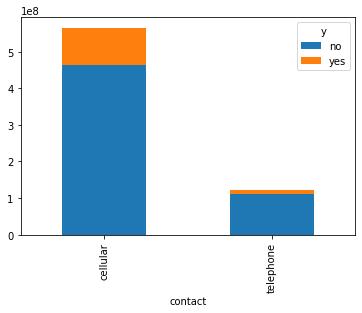

In [86]:
df_telephone.plot(kind='bar', stacked=True)

OMMGG YAAYY! We did it!!

# Analysis on attempts made to turn a person into successful depositor

In [87]:
df1

,Customer_id,y,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
0,1,no,telephone,may,mon,307,1,999,0,nonexistent
1,2,no,telephone,may,mon,198,1,999,0,nonexistent
2,3,no,telephone,may,mon,139,1,999,0,nonexistent
3,4,no,telephone,may,mon,217,1,999,0,nonexistent
4,5,no,telephone,may,mon,380,1,999,0,nonexistent
...,...,...,...,...,...,...,...,...,...,...
37079,37080,yes,cellular,nov,fri,334,1,999,0,nonexistent
37080,37081,no,cellular,nov,fri,383,1,999,0,nonexistent
37081,37082,no,cellular,nov,fri,189,2,999,0,nonexistent
37082,37083,yes,cellular,nov,fri,442,1,999,0,nonexistent


In [88]:
fail = df1[(df1['poutcome']=="failure")|(df1['poutcome']=="nonexistent")]
fail

,Customer_id,y,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
0,1,no,telephone,may,mon,307,1,999,0,nonexistent
1,2,no,telephone,may,mon,198,1,999,0,nonexistent
2,3,no,telephone,may,mon,139,1,999,0,nonexistent
3,4,no,telephone,may,mon,217,1,999,0,nonexistent
4,5,no,telephone,may,mon,380,1,999,0,nonexistent
...,...,...,...,...,...,...,...,...,...,...
37079,37080,yes,cellular,nov,fri,334,1,999,0,nonexistent
37080,37081,no,cellular,nov,fri,383,1,999,0,nonexistent
37081,37082,no,cellular,nov,fri,189,2,999,0,nonexistent
37082,37083,yes,cellular,nov,fri,442,1,999,0,nonexistent


In [89]:
#Count of all rows in poutcome
f=fail.poutcome.count()
f

35845

Analysis based on 'previous' - number of contacts performed before this campaign and for this client 

In [90]:
attempt_prev =  df1[["y", "previous"]].loc[(df1["y"] == "yes")]

<AxesSubplot:ylabel='None'>

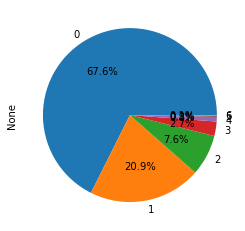

In [91]:
attempt_prev.groupby('previous').size().plot.pie(autopct='%1.1f%%')

No. of yes in 1st attempt - 67.6%
No. of yes in 2nd attempt - 20.9% and so on.

NOTE: How to do +1? How to merge 3,4,5, so on...?

-----------------------------------------------------------------------------------------------------------------

Analysis based on 'campaign' - number of contacts performed during this campaign and for this client (includes last contact)

In [92]:
attempt_camp =  df1[["y", "campaign"]].loc[(df1["y"] == "yes")]

<AxesSubplot:ylabel='Number of Attempts'>

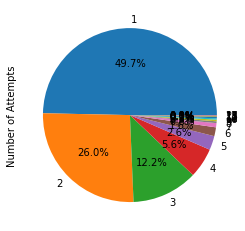

In [93]:
attempt_camp.groupby('campaign').size().plot.pie(label='Number of Attempts', autopct='%1.1f%%')

This is actual imp graph. Shows no. of contacts DURING THIS campaign. 

More than 5 attempts, how to combine?

In [94]:
att_camp = df1.groupby(['campaign', 'y'])['Customer_id'].sum().unstack().fillna(0)
att_camp

y,no,yes
campaign,,
1,250374330.0,59652602.0
2,145096649.0,29903290.0
3,70778413.0,13480649.0
4,36323381.0,5952494.0
5,23325487.0,2691778.0
6,13957954.0,1519961.0
7,9452767.0,786416.0
8,5956827.0,287710.0
9,3975457.0,198837.0


<AxesSubplot:xlabel='campaign'>

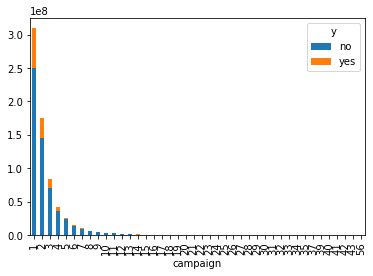

In [95]:
att_camp.plot(kind='bar', stacked=True)

Okay, this is funny, but I tried lol. Not gonna use this, ofc

In [96]:
attempt_pout =  df1[["y", "poutcome"]].loc[(df1["y"] == "yes")]

<AxesSubplot:ylabel='Number of Attempts'>

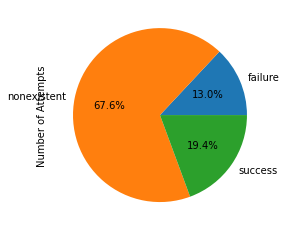

In [97]:
attempt_pout.groupby('poutcome').size().plot.pie(label='Number of Attempts', autopct='%1.1f%%')

Shows how many got converted/continued depositing. Don't know if it's imp or not

# Personal Data Analysis

In [98]:
#Join customer response data with customer & bank details
df4 = pd.merge(cust_resp_data, cust_and_bank_det, on='Customer_id', how='outer')

In [99]:
df4

,Customer_id,y,age,job,marital,education,default,housing,loan,Region_Code,State_Code,City_Code
0,1,no,56,services,married,high.school,no,no,yes,3,S1,C1
1,2,no,45,services,married,basic.9y,unknown,no,no,3,S1,C1
2,3,no,59,admin.,married,professional.course,no,no,no,4,S2,C2
3,4,no,41,blue-collar,married,unknown,unknown,no,no,3,S3,C3
4,5,no,24,technician,single,professional.course,no,yes,no,3,S3,C3
...,...,...,...,...,...,...,...,...,...,...,...,...
37079,37080,yes,73,retired,married,professional.course,no,yes,no,2,S16,C21
37080,37081,no,46,blue-collar,married,professional.course,no,no,no,2,S16,C21
37081,37082,no,56,retired,married,university.degree,no,yes,no,2,S16,C21
37082,37083,yes,44,technician,married,professional.course,no,no,no,4,S17,C49


In [100]:
#loan analysis
loan_analyse =  df4[["loan", "y"]].loc[(df4["loan"] == "no")]

<AxesSubplot:ylabel='Response'>

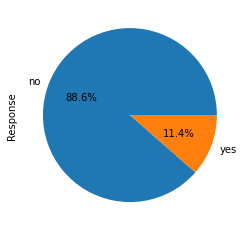

In [101]:
loan_analyse.groupby('y').size().plot.pie(label='Response', autopct='%1.1f%%')

In [102]:
#loan analysis
loan_analyse =  df4[["loan", "y"]].loc[(df4["loan"] == "yes")]

<AxesSubplot:ylabel='Response'>

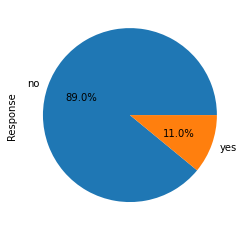

In [103]:
loan_analyse.groupby('y').size().plot.pie(label='Response', autopct='%1.1f%%')

In [104]:
analys_loan = df4.groupby(['loan', 'y'])['Customer_id'].sum().unstack().fillna(0)
analys_loan

y,no,yes
loan,,
no,470972981,95667861
unknown,12808963,2694085
yes,88793400,16692780


<AxesSubplot:xlabel='loan'>

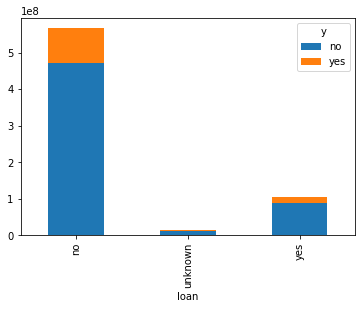

In [105]:
analys_loan.plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='loan'>

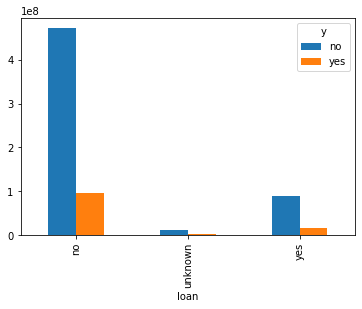

In [106]:
analys_loan.plot(kind='bar')

In [107]:
#Job Analysis
analys_job = df4.groupby(['job', 'y'])['Customer_id'].sum().unstack().fillna(0)

<AxesSubplot:xlabel='job'>

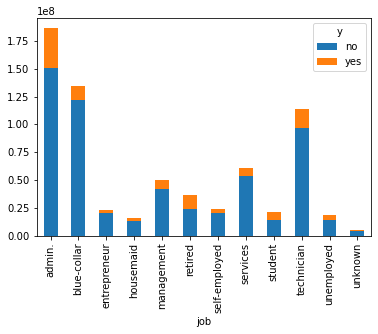

In [108]:
analys_job.plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='job'>

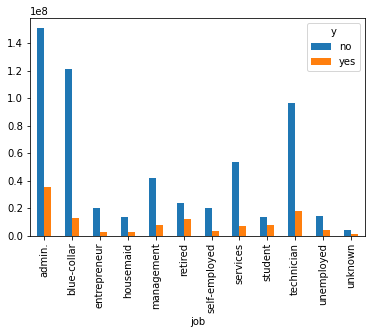

In [109]:
analys_job.plot(kind='bar')

In [110]:
#Education Analysis
analys_educ = df4.groupby(['education', 'y'])['Customer_id'].sum().unstack().fillna(0)

<AxesSubplot:xlabel='education'>

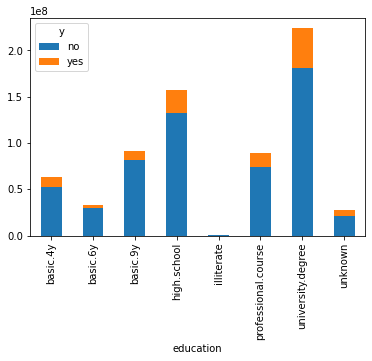

In [111]:
analys_educ.plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='education'>

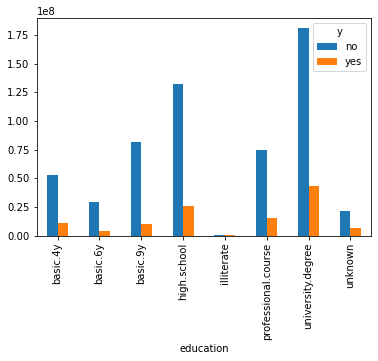

In [112]:
analys_educ.plot(kind='bar')

# Social Economic Analysis

In [113]:
df5 = pd.merge(cust_resp_data, cust_social_eco_data, on='Customer_id', how='outer')

In [114]:
df5

,Customer_id,y,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1,no,1.1,93.994,-36.4,4.857,5191.0
1,2,no,1.1,93.994,-36.4,4.857,5191.0
2,3,no,1.1,93.994,-36.4,4.857,5191.0
3,4,no,1.1,93.994,-36.4,4.857,5191.0
4,5,no,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...
37079,37080,yes,-1.1,94.767,-50.8,1.028,4963.6
37080,37081,no,-1.1,94.767,-50.8,1.028,4963.6
37081,37082,no,-1.1,94.767,-50.8,1.028,4963.6
37082,37083,yes,-1.1,94.767,-50.8,1.028,4963.6
